In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [204]:
train_raw_data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

In [205]:
train_raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


EDA


In [206]:
train_raw_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

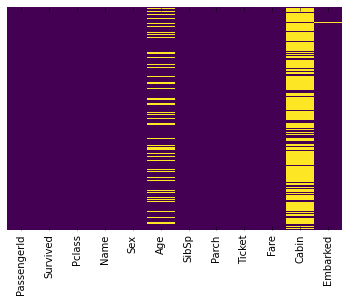

In [207]:
sns.heatmap(train_raw_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Approximately 20 percent of the "Age" data is missing, so we can consider to impute the age data column. But Cabin data is missing too much to consider any of of imputation so it is better to drop the column itself.

<AxesSubplot:xlabel='Survived', ylabel='count'>

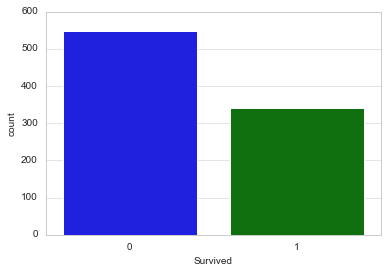

In [208]:
sns.set_style('whitegrid')
sns.countplot(x="Survived", data = train_raw_data)

As we can see more than half of them have not survived based on this raw data.

<AxesSubplot:xlabel='Survived', ylabel='count'>

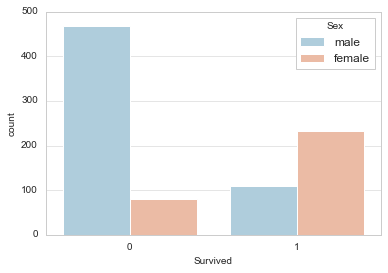

In [209]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data = train_raw_data, palette='RdBu_r')

Based on the above plot, females have survived more than male.

<AxesSubplot:xlabel='Survived', ylabel='count'>

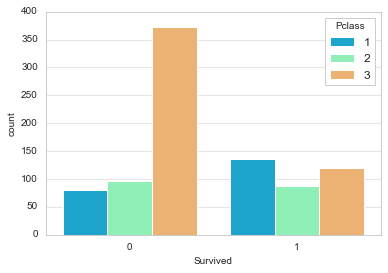

In [210]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = train_raw_data, palette = 'rainbow')

As we can see lower class passengers survival rate is lesser than the higher class passengers. 

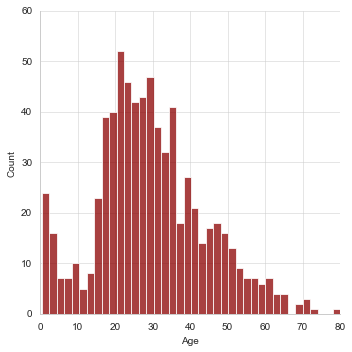

In [211]:
sns.displot(train_raw_data['Age'].dropna(), kde = False, color= 'darkred', bins = 40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

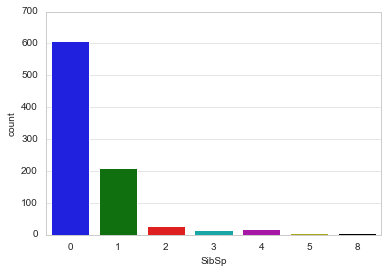

In [212]:
sns.countplot(x ='SibSp', data= train_raw_data)

<AxesSubplot:>

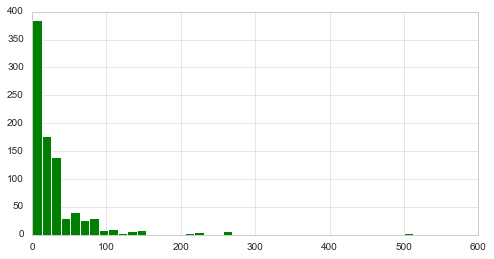

In [213]:
train_raw_data['Fare'].hist(color ='green', bins = 40, figsize= (8,4))

Data cleaning

Lets fill in missing data with imputation or another way is to check avg age by passengers class

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

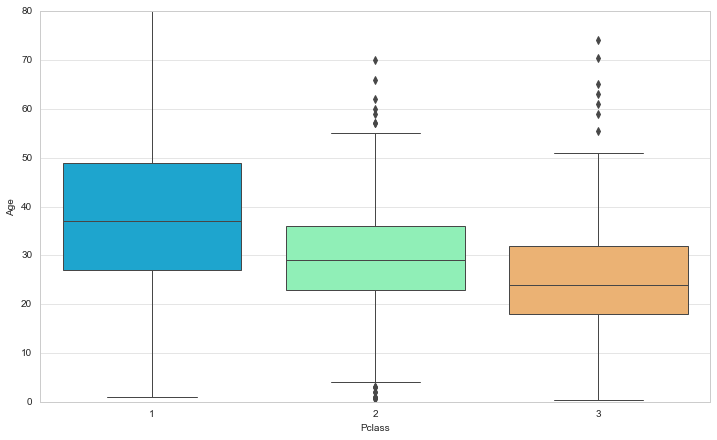

In [214]:
plt.figure(figsize = (12,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train_raw_data, palette='rainbow')

we can see that class 1 avg passenger age is about 37-38 yrs, class-2 avg passenger age is 29 and class 3 avg passenger age is 24. 
We can also see that wealthier passengers fall under older groups, so we can use these values to impute based on Pclass for Age.

In [215]:
def impute_age(cols):
    Age = cols[0]
    Pclass =cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [216]:
train_raw_data['Age'] = train_raw_data[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

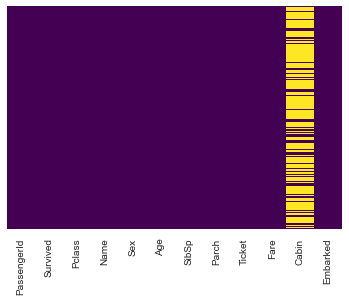

In [217]:
sns.heatmap(train_raw_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Lets drop Cabin column


In [218]:
train_raw_data.drop('Cabin', axis =1, inplace = True)

In [219]:
train_raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Converting Catogorical Features

In [220]:
train_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [221]:
pd.get_dummies(train_raw_data['Embarked'], drop_first = True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [222]:
sex = pd.get_dummies(train_raw_data['Sex'], drop_first= True)
embark = pd.get_dummies(train_raw_data['Embarked'], drop_first= True)

In [223]:
train_raw_data.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis= 1, inplace = True)

In [224]:
train_raw_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [225]:
train_raw_data = pd.concat([train_raw_data, sex, embark], axis = 1)

In [226]:
train_raw_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Building a Logistic Regression Model

Train Test Split

In [227]:
train_raw_data.drop('Survived', axis = 1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [228]:
train_raw_data['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [229]:
from sklearn.model_selection import train_test_split

In [230]:
X_train, X_test, y_train, y_test = train_test_split(train_raw_data.drop('Survived', axis = 1), train_raw_data['Survived'], test_size= 0.30, random_state= 101)

Training and predicting

Logistic Regression

In [258]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, ConfusionMatrixDisplay
from matplotlib import style

In [260]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test Accuracy is: {:.2f}%".format(logreg_acc*100))

Test Accuracy is: 78.73%


In [261]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.68      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



TN:  134
FN:  37
TP:  77
FN:  20


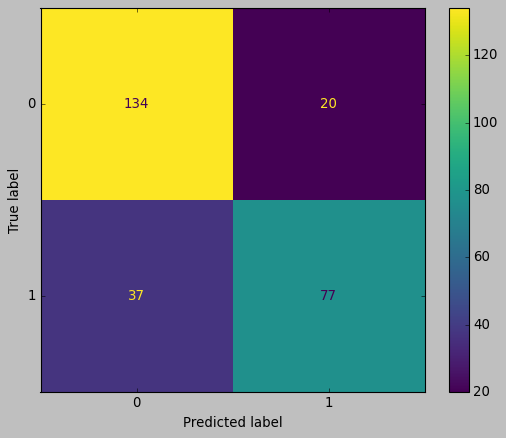

In [262]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels =logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FN: ", cm[0][1])

In [263]:
# RSME
logreg_pred = logreg.predict(X_test)
test_rmse = mean_squared_error(y_test, logreg_pred, squared = False)

print(f'Test RMSE: {test_rmse}')

Test RMSE: 0.4611795389695635


Random Forest

In [236]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, ConfusionMatrixDisplay
from matplotlib import style

In [237]:
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)
rforest_acc = accuracy_score(rforest_pred, y_test)
print("Test Accuracy: {:.2f}".format(rforest_acc*100))

Test Accuracy: 81.72


In [238]:
print(classification_report(y_test, rforest_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       154
           1       0.86      0.68      0.76       114

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.82      0.82      0.81       268



In [239]:
# RSME
rforest_pred = rforest.predict(X_test)
test_rmse = mean_squared_error(y_test, rforest_pred, squared = False)

print(f'Test RMSE: {test_rmse}')


Test RMSE: 0.4275930552470683


Decision Tree

In [240]:
from sklearn.tree import DecisionTreeClassifier

In [241]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_acc =accuracy_score(dtree_pred, y_test)
print("Test accuracy: {:.2f}%".format(dtree_acc*100))

Test accuracy: 75.00%


In [242]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       154
           1       0.74      0.63      0.68       114

    accuracy                           0.75       268
   macro avg       0.75      0.73      0.74       268
weighted avg       0.75      0.75      0.75       268



TN:  129
FN:  42
TP:  72
FN:  25


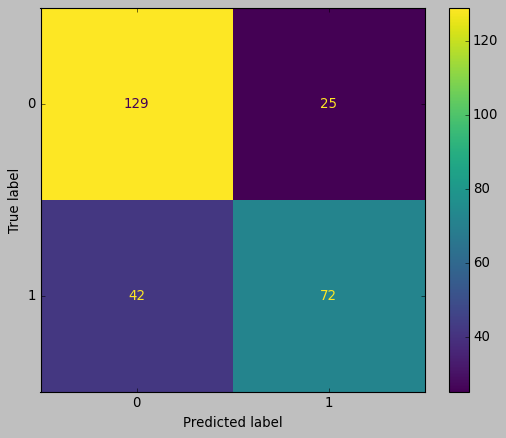

In [243]:
style.use('classic')
cm = confusion_matrix(y_test, dtree_pred, labels =dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dtree.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FN: ", cm[0][1])

In [264]:
# RSME
dtree_pred = dtree.predict(X_test)
test_rmse = mean_squared_error(y_test, dtree_pred, squared = False)

print(f'Test RMSE: {test_rmse}')

Test RMSE: 0.5


Adaptive Boosting

In [245]:
from sklearn.ensemble import AdaBoostClassifier

In [246]:
adaboost = AdaBoostClassifier()

adaboost.fit(X_train, y_train)
adaboost_pred = adaboost.predict(X_test)
adaboost_acc = accuracy_score(adaboost_pred, y_test)
print("Test Accuracy is: {:.2f}%".format(adaboost_acc*100))

Test Accuracy is: 77.24%


In [247]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       154
           1       0.80      0.62      0.70       114

    accuracy                           0.77       268
   macro avg       0.78      0.75      0.76       268
weighted avg       0.78      0.77      0.77       268



TN:  132
FN:  39
TP:  75
FN:  22


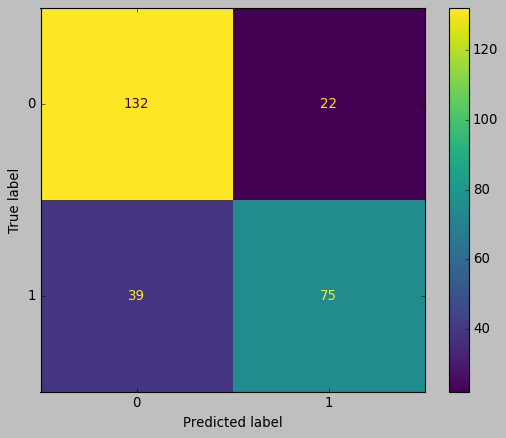

In [248]:
style.use('classic')
cm = confusion_matrix(y_test, adaboost_pred, labels =adaboost.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = adaboost.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FN: ", cm[0][1])

In [249]:
# RSME
adaboost_pred = adaboost.predict(X_test)
test_rmse = mean_squared_error(y_test, adaboost_pred, squared = False)

print(f'Test RMSE: {test_rmse}')

Test RMSE: 0.47708693159476445


XGB Classifier:

In [250]:
import xgboost
from xgboost import XGBClassifier

In [251]:
xg = XGBClassifier()
xg.fit(X_train, y_train)
xg_pred = xg.predict(X_test)
xg_acc = accuracy_score(xg_pred, y_test)
print("Test Accuracy is: {:.2f}%".format(xg_acc*100))

Test Accuracy is: 79.10%


In [252]:
print(classification_report(y_test, xg_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       154
           1       0.82      0.66      0.73       114

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



TN:  137
FN:  39
TP:  75
FN:  17


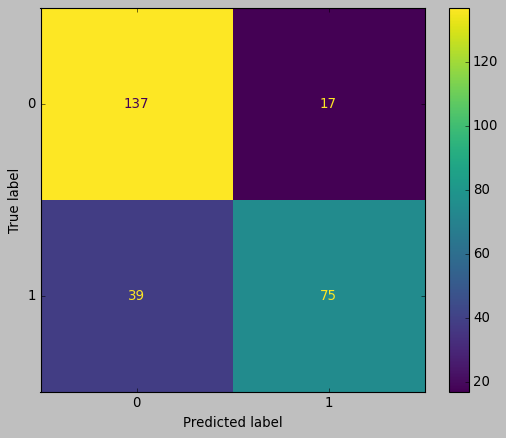

In [253]:
style.use('classic')
cm = confusion_matrix(y_test, xg_pred, labels =xg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = xg.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FN: ", cm[0][1])

In [254]:
# RSME
xg_pred = xg.predict(X_test)
test_rmse = mean_squared_error(y_test, xg_pred, squared = False)

print(f'Test RMSE: {test_rmse}')

Test RMSE: 0.45711620391383745


Compile Results:

In [265]:
rmse_compilation = {'model': ['logistic regression', 'Random Forest', 'Decision Tree', 'Adaptive Boosting', 'XGB Classifier'], 'RMSE': [0.4611, 0.4275, 0.5, 0.4770, 0.457 ]}


In [266]:
rmse_df = pd.DataFrame(data =rmse_compilation)
rmse_df.sort_values(by= ['RMSE'], ascending = True)

,model,RMSE
1,Random Forest,0.4275
4,XGB Classifier,0.4570
0,logistic regression,0.4611
3,Adaptive Boosting,0.4770
2,Decision Tree,0.5000


As we can see Random Forest model is the most accurate comparing to all other models.
We got pretty good score of achieving 81.72 in Random Forest model. 
We began our project by exploring the dataset and finding the answers thriugh visualization We treated missing values and replaced them appropriately . 
We also converted the categorical data using dummy variables. We then built a bunch of models and compared them to find the best model.